In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

from pymc3 import *

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.8


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=0.5, size=size)

data = dict(x=x, y=y)

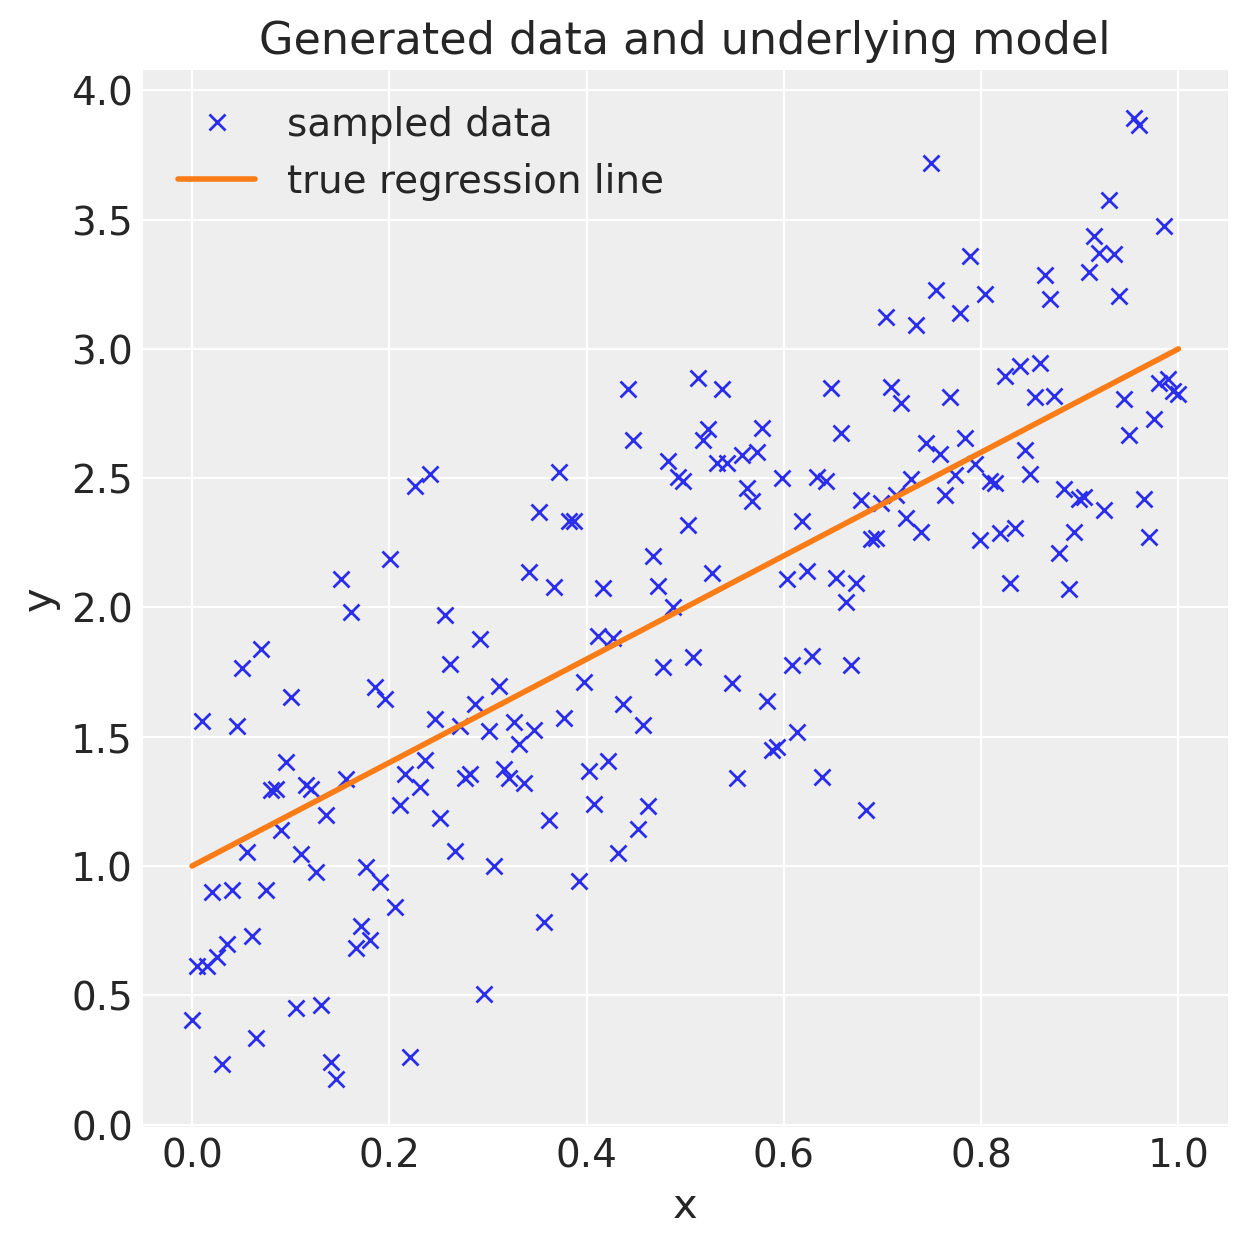

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);



In [5]:
with Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = Normal("Intercept", 0, sigma=20)
    x_coeff = Normal("x", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=2)  # draw 30

INFO (theano.gof.compilelock): Waiting for existing lock by process '28874' (I am process '29408')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/giorgio/.theano/compiledir_Darwin-19.6.0-x86_64-i386-64bit-i386-3.7.7-64/lock_dir



You can find the C code in this temporary file: /var/folders/ny/mqy36hy55r3c22qq88f88lbm0000gn/T/theano_compilation_error_96_amteq


Exception: ("Compilation failed (return status=1): In file included from /Users/giorgio/.theano/compiledir_Darwin-19.6.0-x86_64-i386-64bit-i386-3.7.7-64/tmpoun4b4u4/mod.cpp:1:. In file included from /Users/giorgio/opt/anaconda3/include/python3.7m/Python.h:25:. /Users/giorgio/opt/anaconda3/bin/../include/c++/v1/stdio.h:107:15: fatal error: 'stdio.h' file not found. #include_next <stdio.h>.               ^~~~~~~~~. 1 error generated.. ", '[Elemwise{log,no_inplace}(TensorConstant{1.0})]')

In [6]:
import theano
